# Historical Property Data EDA

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('../data/raw/Property_Assessment_Data__Historical_.csv')

c:\Users\mitch\Documents\Data Science Side Projects\Edmonton Property Dashboard\prop_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
house_data.head()

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
0,1068451,2015,NaN,4007.0,SAVARYN DRIVE SW,SW 22-51-24-4,NaN,NaN,NaN,SUMMERSIDE,...,N,RPL,109314.321,7597000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
1,1152594,2012,NaN,17310.0,97 STREET NW,NaN,NaN,NaN,NaN,ELSINORE,...,N,AG,0.000,12500.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
2,1153568,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BATTERY OIL FIELDS,...,N,AG,0.000,88000.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
3,1153626,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BATTERY OIL FIELDS,...,N,AG,0.000,0.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
4,1248590,2016,NaN,NaN,NaN,NW 3-52-25-4,NaN,NaN,NaN,TERWILLEGAR AREA,...,N,A,10000.000,49500.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN


In [4]:
house_data.columns

Index(['Account Number', 'Assessment Year', 'Suite', 'House Number',
       'Street Name', 'Legal Description', 'Latitude', 'Longitude',
       'Point Location', 'Neighbourhood', 'Actual Year Built', 'Garage',
       'Zoning', 'Lot Size', 'Assessed Value', 'Assessment Class 1',
       'Assessment Class % 1', 'Assessment Class 2', 'Assessment Class % 2',
       'Assessment Class 3', 'Assessment Class % 3'],
      dtype='object')

In [5]:
house_data.shape

(3384820, 21)

In [6]:
house_data['Account Number'].is_unique

False

Some properties have multiple assessments

In [7]:
house_data['Assessment Class 1'].unique()

array(['RESIDENTIAL', 'COMMERCIAL', nan, 'FARMLAND', 'OTHER RESIDENTIAL',
       'NONRES MUNICIPAL/RES EDUCATION'], dtype=object)

In [8]:
house_data['Assessment Class 2'].unique()

array([nan, 'RESIDENTIAL', 'FARMLAND', 'COMMERCIAL', 'OTHER RESIDENTIAL',
       'NONRES MUNICIPAL/RES EDUCATION'], dtype=object)

In [9]:
house_data['Assessment Class 3'].unique()

array([nan, 'FARMLAND', 'COMMERCIAL', 'RESIDENTIAL', 'OTHER RESIDENTIAL',
       'NONRES MUNICIPAL/RES EDUCATION'], dtype=object)

In [10]:
house_data[~house_data['Assessment Class 2'].isna()]

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
718,1008770,2015,NaN,10640.0,180 STREET NW,Plan: 7214KS Lot: 2,53.55080,-113.63436,POINT (-113.63436 53.5508),WILSON INDUSTRIAL,...,N,IM,64683.449,1779000.0,COMMERCIAL,1.0,RESIDENTIAL,99.0,NaN,NaN
807,1001544,2013,NaN,2703.0,184 STREET NW,SE 4-52-25-4,53.45936,-113.62259,POINT (-113.62259 53.45936),RURAL WEST,...,N,A,212866.582,552000.0,RESIDENTIAL,99.0,FARMLAND,1.0,NaN,NaN
2272,1002294,2013,NaN,2304.0,184 STREET NW,SE 5-52-25-4,53.45754,-113.64299,POINT (-113.64299 53.45754),RURAL WEST,...,N,AG,303777.470,96500.0,RESIDENTIAL,24.0,FARMLAND,76.0,NaN,NaN
3511,1002328,2019,NaN,18904.0,23 AVENUE NW,SE 5-52-25-4,53.45754,-113.64905,POINT (-113.64905 53.45754),THE UPLANDS,...,N,AG,303770.525,2159000.0,RESIDENTIAL,99.0,FARMLAND,1.0,NaN,NaN
3543,1001361,2012,NaN,2005.0,184 STREET NW,NE 33-51-25-4 / NW 33-51-25-4,53.45081,-113.63449,POINT (-113.63449 53.45081),RURAL WEST,...,N,AG,383887.175,760500.0,RESIDENTIAL,92.0,FARMLAND,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382038,10945385,2020,NaN,310.0,PARSONS ROAD SW,Plan: 1922859 Block: 2 Lot: 2,53.43101,-113.48145,POINT (-113.48145 53.43101),ELLERSLIE INDUSTRIAL,...,N,EIB,21460.293,2436500.0,COMMERCIAL,76.0,FARMLAND,23.0,FARMLAND,1.0
3382764,10945386,2020,NaN,420.0,PARSONS ROAD SW,Plan: 1922859 Block: 2 Lot: 3,53.42993,-113.48149,POINT (-113.48149 53.42993),ELLERSLIE INDUSTRIAL,...,N,EIB,15775.722,2436000.0,COMMERCIAL,68.0,FARMLAND,31.0,FARMLAND,1.0
3382790,10931838,2020,NaN,51012.0,HIGHWAY 2 SERVICE ROAD 2 SW,NaN,53.36892,-113.53245,POINT (-113.53245 53.36892),EDMONTON SOUTH CENTRAL,...,Y,AES,156856.467,660500.0,RESIDENTIAL,93.0,COMMERCIAL,4.0,FARMLAND,2.0
3383112,10928855,2020,NaN,6415.0,200 STREET SW,Plan: 1920354 Block: 1 Lot: 5,53.37485,-113.66125,POINT (-113.66125 53.37485),EDMONTON SOUTH WEST,...,Y,AES,50029.309,512500.0,RESIDENTIAL,99.0,FARMLAND,1.0,NaN,NaN


Assessment class looks to classify if the property is a certain type of property (residential, commercial, etc.). Some properties can consist of multiple classes (eg. an apartment building with businesses on the main floor).

For this project, I will only be focused only on residential properties.

## Residential Clean Up

In [11]:
resi_house_data = house_data[(house_data['Assessment Class 1'] == 'RESIDENTIAL') & (house_data['Assessment Class % 1'] == 100)]

In [12]:
resi_house_data

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
0,1068451,2015,NaN,4007.0,SAVARYN DRIVE SW,SW 22-51-24-4,NaN,NaN,NaN,SUMMERSIDE,...,N,RPL,109314.321,7597000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
7,1650860,2014,NaN,NaN,NaN,Plan: 3782RS Block: 1 Lot: 30U,53.51545,-113.61627,POINT (-113.61627 53.51545),THORNCLIFF,...,N,RF1,118.072,0.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
9,2914836,2018,NaN,13004.0,115 AVENUE NW,Plan: 1568HW Block: 4 Lot: 21,NaN,NaN,NaN,INGLEWOOD,...,Y,RF3,490.277,358500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
14,3169893,2019,NaN,2503.0,101 STREET SW,Plan: 8721140 Block: E,NaN,NaN,NaN,ELLERSLIE INDUSTRIAL,...,N,AGI,49452.501,244500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
28,9947689,2013,NaN,35.0,ELSINORE PLACE NW,NE 5-54-24-4,NaN,NaN,NaN,ELSINORE,...,N,RF1,711.319,55500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384813,10937630,2020,NaN,3703.0,2 STREET NW,Plan: 1922185 Block: 6 Lot: 4,53.47286,-113.34529,POINT (-113.34529 53.47286),MAPLE,...,N,RMD,334.741,74500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3384814,10961829,2020,43,1391.0,STARLING DRIVE NW,Plan: 1621919 Unit: 56,53.59888,-113.65292,POINT (-113.65292 53.59888),STARLING,...,Y,RA7,205.444,281500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3384816,10954527,2020,NaN,NaN,NaN,Plan: 1923211 Unit: 87A,53.51841,-113.50710,POINT (-113.5071 53.51841),GARNEAU,...,N,DC1,5.849,10000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3384817,10954448,2020,116,10728.0,82 AVENUE NW,Plan: 1923211 Unit: 7A,53.51841,-113.50710,POINT (-113.5071 53.51841),GARNEAU,...,N,DC1,63.649,408000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN


In [13]:
pd.set_option('float_format', '{:f}'.format)
resi_house_data['Assessed Value'].describe()

count    3159043.000000
mean      316251.180583
std       267990.034578
min            0.000000
25%       188500.000000
50%       315500.000000
75%       407500.000000
max     30081500.000000
Name: Assessed Value, dtype: float64

In [14]:
resi_house_data['Lot Size'].describe()

count   3133955.000000
mean        575.083918
std        6655.532823
min           0.000000
25%         116.873000
50%         386.330000
75%         568.710000
max      692660.676000
Name: Lot Size, dtype: float64

Because we are working with residential properties, lets take a look at Zoning codes and see if we can isolate for residential zoning.
From the City Of Edmonton Zoning Bylaw - the codes that apply for residential zones are:

RF1, RSL, RF2, RPL, RLD, RF3, RF4, RMD, RF5, UCRH, RF6, RA7, RA8, RA9, RR, RMH


In [15]:
res_zones = ['RF1', 'RSL', 'RF2', 'RPL', 'RLD', 'RF3', 'RF4', 'RMD', 'RF5', 'UCRH', 'RF6', 'RA7', 'RA8', 'RA9', 'RR', 'RMH']

In [16]:
zones = resi_house_data['Zoning'].unique().tolist()

Not all values are strings in this list, lets see where they are

In [17]:
index = 0
for item in zones:
    try:
        float(item)
        print(index)
    except ValueError:
        index += 1

31


In [18]:
zones[31]

nan

There are NaN zoning values, but we are focused on residential zoning properties so these will be ignored

In [19]:
zones[31] = str(zones[31])
type(zones[31])

str

In [20]:
zoning_list = [item for item in zones for zone in res_zones if zone in item]

In [21]:
resi_house_data = resi_house_data[resi_house_data['Zoning'].isin(zoning_list)]

## Check if there are any nulls for assessed value or lot size 

In [22]:
resi_house_data[resi_house_data['Assessed Value'].isnull() == True]

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3


In [23]:
resi_house_data[resi_house_data['Lot Size'].isnull() == True]

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
40,10001923,2020,NaN,3442.000000,LAKEVIEW POINT NW,NaN,53.552230,-113.696790,POINT (-113.69679 53.55223),WESTVIEW VILLAGE,...,Y,RMH,NaN,117500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
43,10018932,2014,NaN,125.000000,RIDGEWAY DRIVE NW,NaN,53.503900,-113.359340,POINT (-113.35934 53.5039),MAPLE RIDGE,...,N,RMH,NaN,43000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
44,10018932,2015,NaN,125.000000,RIDGEWAY DRIVE NW,NaN,53.503900,-113.359340,POINT (-113.35934 53.5039),MAPLE RIDGE,...,N,RMH,NaN,46500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
45,10020385,2014,NaN,5.000000,QUARRY CRESCENT NW,NaN,53.499900,-113.362130,POINT (-113.36213 53.4999),MAPLE RIDGE,...,N,RMH,NaN,71000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
46,10020385,2019,NaN,5.000000,QUARRY CRESCENT NW,NaN,53.499900,-113.362130,POINT (-113.36213 53.4999),MAPLE RIDGE,...,N,RMH,NaN,51000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380215,10939888,2019,NaN,2003.000000,WEST VIEW GREEN NW,NaN,53.552230,-113.696790,POINT (-113.69679 53.55223),WESTVIEW VILLAGE,...,N,RMH,NaN,92500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3381478,10935242,2020,NaN,124.000000,OAK WOOD ROAD NW,NaN,53.504310,-113.363350,POINT (-113.36335 53.50431),SOUTHEAST (ANNEXED) INDUSTRIAL,...,N,RMH,NaN,60500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3382471,10930398,2019,NaN,58.000000,EVERGREEN PARK NW,NaN,53.631220,-113.352220,POINT (-113.35222 53.63122),EVERGREEN,...,N,RMH,NaN,68000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3383050,10984049,2020,NaN,287.000000,EVERGREEN PARK NW,NaN,53.631230,-113.354560,POINT (-113.35456 53.63123),EVERGREEN,...,N,RMH,NaN,97500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN


There are a number of assessed properties with no lot size info, lets take a closer look.

In [24]:
no_lot_size = resi_house_data[resi_house_data['Lot Size'].isnull() == True]
no_lot_size['Zoning'].value_counts()

RMH     20288
RA8h      128
RF4        21
RF1         7
RR          2
RSL         1
Name: Zoning, dtype: int64

From zoning information, appears the vast majority of the lot size missing property assessments belong to mobile homes (RMH). After consulting with a real estate agent, mobile homes do not have lot sizes because they do not own the lots that their mobile homes are located. The average mobile home park lot size ranges from 960 - 2400 square feet. Using the median of 1680 square feet, we can impute a lot size of 156 square meters.

In [25]:
mobile_mask = no_lot_size[(no_lot_size['Zoning'] == 'RMH')]

In [26]:
mobile_mask['Lot Size'].isna().value_counts()

True    20288
Name: Lot Size, dtype: int64

In [27]:
mobile_indexes = mobile_mask.index.tolist()

In [28]:
resi_house_data.loc[mobile_indexes, 'Lot Size'] = 156

In [29]:
#sanity check
resi_house_data.loc[mobile_indexes]['Lot Size'].mean()

156.0

Lets take a look at the rest of the properties

In [30]:
no_lot_size = resi_house_data[resi_house_data['Lot Size'].isnull() == True]
no_lot_size['Zoning'].value_counts()

RA8h    128
RF4      21
RF1       7
RR        2
RSL       1
Name: Zoning, dtype: int64

In [31]:
no_lot_size[no_lot_size['Zoning'] == 'RA8h'].head()

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
1877754,9955728,2012,106.000000,17109.000000,67 AVENUE NW,Plan: 9821966 Unit: 6,53.502390,-113.617800,POINT (-113.6178 53.50239),CALLINGWOOD SOUTH,...,N,RA8h,NaN,178500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
1877941,9955724,2012,102.000000,17109.000000,67 AVENUE NW,Plan: 9821966 Unit: 2,53.502390,-113.617800,POINT (-113.6178 53.50239),CALLINGWOOD SOUTH,...,N,RA8h,NaN,205500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
1878195,9955783,2012,409.000000,17109.000000,67 AVENUE NW,Plan: 9821966 Unit: 62,53.502390,-113.617800,POINT (-113.6178 53.50239),CALLINGWOOD SOUTH,...,N,RA8h,NaN,169000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
1878291,9955731,2012,110.000000,17109.000000,67 AVENUE NW,Plan: 9821966 Unit: 9,53.502390,-113.617800,POINT (-113.6178 53.50239),CALLINGWOOD SOUTH,...,N,RA8h,NaN,144000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
1878381,9955748,2013,210.000000,17109.000000,67 AVENUE NW,Plan: 9821966 Unit: 27,53.502390,-113.617800,POINT (-113.6178 53.50239),CALLINGWOOD SOUTH,...,N,RA8h,NaN,137000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN


In [32]:
no_lot_size['House Number'][no_lot_size['Zoning'] == 'RA8h'].value_counts()

17109.000000    128
Name: House Number, dtype: int64

For RA8h, all rows are from the same building (17109 67 Ave NW), but different suites. After looking at old listings at this building, the square footage ranges from 915 - 1152. Converting the median of 1033.5 and converting it to square meters, we get a value of 96 to be imputed.

In [33]:
def imputer(zone_name, impute_number):
    mask = no_lot_size[no_lot_size['Zoning'] == zone_name]
    mask_indexes = mask.index.tolist()
    resi_house_data.loc[mask_indexes, 'Lot Size'] = impute_number
    #sanity check
    print(resi_house_data.loc[mask_indexes]['Lot Size'].mean())

In [34]:
imputer('RA8h', 96)

96.0


In [35]:
no_lot_size = resi_house_data[resi_house_data['Lot Size'].isnull() == True]
no_lot_size['Zoning'].value_counts()

RF4    21
RF1     7
RR      2
RSL     1
Name: Zoning, dtype: int64

In [36]:
no_lot_size['Street Name'][no_lot_size['Zoning'] == 'RF4'].value_counts()

OAK WOOD DRIVE NW       18
OAK WOOD CRESCENT NW     3
Name: Street Name, dtype: int64

These streets belong to a mobile park, will use the 156 as before

In [37]:
imputer('RF4', 156)

156.0


In [38]:
no_lot_size['Street Name'][no_lot_size['Zoning'] == 'RF1'].value_counts()

WINTERBURN ROAD NW     4
WEST ROYAL PLACE NW    3
Name: Street Name, dtype: int64

Same here

In [39]:
imputer('RF1', 156)

156.0


In [40]:
no_lot_size = resi_house_data[resi_house_data['Lot Size'].isnull() == True]
no_lot_size

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
1828096,9937214,2014,NaN,2360.000000,28 AVENUE SW,NaN,53.409480,-113.380090,POINT (-113.38009 53.40948),RURAL SOUTH EAST,...,Y,RR,NaN,48000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2159655,10007676,2014,NaN,1804.000000,184 STREET SW,NaN,53.414830,-113.645530,POINT (-113.64553 53.41483),KESWICK AREA,...,N,RSL,NaN,204500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2992446,10285625,2014,NaN,2340.000000,28 AVENUE SW,NaN,53.409550,-113.377730,POINT (-113.37773 53.40955),RURAL SOUTH EAST,...,N,RR,NaN,111000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN


All three final properties appear to be rural properties. Using the https://opengovca.com/ website, we are able to input the correct lot sizes for each location. 

In [41]:
resi_house_data.loc[1828096, 'Lot Size'] = 28237.3410
resi_house_data.loc[2159655, 'Lot Size'] = 490470.8341
resi_house_data.loc[2992446, 'Lot Size'] = 26643.7690

In [42]:
no_lot_size = resi_house_data[resi_house_data['Lot Size'].isnull() == True]
no_lot_size['Zoning'].value_counts()

Series([], Name: Zoning, dtype: int64)

Assessed Value and Lot size are all cleaned up

## Check if every property has (address or legal description)

In [43]:
no_addy_df = resi_house_data[resi_house_data['Street Name'].isnull() & resi_house_data['Legal Description'].isnull()]
no_addy_df

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
459646,3000429,2012,NaN,NaN,NaN,NaN,53.498540,-113.610090,POINT (-113.61009 53.49854),OLESKIW,...,N,RF5,10120.000000,5659000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
460213,3000429,2016,NaN,NaN,NaN,NaN,53.498540,-113.610090,POINT (-113.61009 53.49854),OLESKIW,...,N,RF5,10120.000000,8281000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
464659,3000429,2013,NaN,NaN,NaN,NaN,53.498540,-113.610090,POINT (-113.61009 53.49854),OLESKIW,...,N,RF5,10120.000000,6371000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
465826,3000429,2017,NaN,NaN,NaN,NaN,53.498540,-113.610090,POINT (-113.61009 53.49854),OLESKIW,...,N,RF5,10120.000000,7412500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
469168,3000429,2014,NaN,NaN,NaN,NaN,53.498540,-113.610090,POINT (-113.61009 53.49854),OLESKIW,...,N,RF5,10120.000000,6689500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381508,10936105,2020,NaN,NaN,NaN,NaN,53.501280,-113.652170,POINT (-113.65217 53.50128),ORMSBY PLACE,...,N,RF1,202.957000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3383629,10971296,2020,NaN,NaN,NaN,NaN,53.607920,-113.393990,POINT (-113.39399 53.60792),KIRKNESS,...,N,RF4,446.751000,16500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3384028,10963810,2020,NaN,NaN,NaN,NaN,53.513520,-113.643810,POINT (-113.64381 53.51352),ALDERGROVE,...,N,RF1,132.700800,4500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
3384123,10936091,2019,NaN,NaN,NaN,NaN,53.507800,-113.468050,POINT (-113.46805 53.5078),HAZELDEAN,...,N,RF3,241.957000,9000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN


In [44]:
no_addy_df['Account Number'].value_counts()

9992002     9
9994852     9
9995012     9
9994708     9
9995505     9
           ..
10965244    1
10966722    1
10971296    1
10963810    1
10935148    1
Name: Account Number, Length: 386, dtype: int64

There are 386 properties with no address - lets confirm that they all have point locations at least.

In [45]:
no_addy_df[no_addy_df['Point Location'].isnull() == True]

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
1996073,9988893,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
1998906,9988893,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2002300,9988893,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2004027,9988893,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2007441,9988893,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,6000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN
2009414,9988893,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTMOUNT,...,N,RF3,208.807000,7500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN


Here is one property (multiple assessments) with no address or map location. Will remove this property from dataset.

In [46]:
remove_index_list = no_addy_df[no_addy_df['Point Location'].isnull() == True].index

In [47]:
print(resi_house_data.shape)
resi_house_data.drop(remove_index_list, inplace=True)
#confirm drop
print(resi_house_data.shape)

(2789026, 21)
(2789020, 21)


## incorporate wards into dataset

In [48]:
current_house_data = pd.read_csv('../data/raw/Property_Assessment_Data__Current_Calendar_Year_.csv')

In [49]:
current_house_data['Ward'].value_counts()

O-day'min Ward                38310
Ipiihkoohkanipiaohtsi Ward    36914
Métis Ward                    36510
pihêsiwin Ward                36353
sipiwiyiniwak Ward            36152
Karhiio Ward                  35373
Nakota Isga Ward              34355
Dene Ward                     33862
Anirniq Ward                  33571
papastew Ward                 31793
tastawiyiniwak Ward           29961
Sspomitapi Ward               28006
Name: Ward, dtype: int64

In [50]:
ward_mask = current_house_data[['Ward','Neighbourhood']]
ward_mask

,Ward,Neighbourhood
0,Karhiio Ward,SUMMERSIDE
1,tastawiyiniwak Ward,BELLE RIVE
2,tastawiyiniwak Ward,BEAUMARIS
3,sipiwiyiniwak Ward,RIO TERRACE
4,sipiwiyiniwak Ward,WESTRIDGE
...,...,...
411161,Ipiihkoohkanipiaohtsi Ward,CHAPPELLE AREA
411162,Ipiihkoohkanipiaohtsi Ward,CAVANAGH
411163,Nakota Isga Ward,WEBBER GREENS
411164,sipiwiyiniwak Ward,EDGEMONT


In [51]:
ward_mask.groupby('Ward')['Neighbourhood'].unique()

Ward
Anirniq Ward                  [HAGMANN ESTATE INDUSTRIAL, GAGNON ESTATE INDU...
Dene Ward                     [RURAL NORTH EAST HORSE HILL, FRASER, BANNERMA...
Ipiihkoohkanipiaohtsi Ward    [SKYRATTLER, KEHEEWIN, BEARSPAW, BLUE QUILL, R...
Karhiio Ward                  [SUMMERSIDE, MEYONOHK, SAKAW, ELLERSLIE, MEYOK...
Métis Ward                    [EASTGATE BUSINESS PARK, WEIR INDUSTRIAL, MONT...
Nakota Isga Ward              [GLENWOOD, WEST JASPER PLACE, ALDERGROVE, WINT...
O-day'min Ward                [OLIVER, CENTRAL MCDOUGALL, WESTMOUNT, QUEEN M...
Sspomitapi Ward               [MAPLE RIDGE, BISSET, WEINLOS, POLLARD MEADOWS...
papastew Ward                 [STRATHCONA, QUEEN ALEXANDRA, GARNEAU, EMPIRE ...
pihêsiwin Ward                [RAMSAY HEIGHTS, HENDERSON ESTATES, RHATIGAN R...
sipiwiyiniwak Ward            [RIO TERRACE, WESTRIDGE, MEADOWLARK PARK, JASP...
tastawiyiniwak Ward           [BELLE RIVE, BEAUMARIS, LAGO LINDO, KILKENNY, ...
Name: Neighbourhood, dtype: object

In [52]:
ward_dict = ward_mask.groupby('Ward')['Neighbourhood'].unique().to_dict()

In [53]:
ward_dict = {k:v.tolist() for k,v in ward_dict.items()}

In [54]:
ward_dict['Dene Ward']

['RURAL NORTH EAST HORSE HILL',
 'FRASER',
 'BANNERMAN',
 'HAIRSINE',
 'BELVEDERE',
 'CLOVER BAR AREA',
 'CASSELMAN',
 'EDMONTON ENERGY AND TECHNOLOGY PARK',
 'RURAL NORTH EAST SOUTH STURGEON',
 'KIRKNESS',
 'ANTHONY HENDAY HORSE HILL',
 'YORK',
 'EBBERS',
 'HOMESTEADER',
 'MARQUIS',
 'GORMAN',
 'KENNEDALE INDUSTRIAL',
 'CY BECKER',
 'MCCONACHIE AREA',
 'BRINTNELL',
 'ANTHONY HENDAY ENERGY PARK',
 'OVERLANDERS',
 'EVERGREEN',
 'ANTHONY HENDAY CLAREVIEW',
 'MCLEOD',
 'MATT BERRY',
 'HOLLICK-KENYON',
 'KERNOHAN',
 'RIVER VALLEY HERMITAGE',
 'CLAREVIEW TOWN CENTRE',
 'BELMONT',
 'CANON RIDGE',
 'SIFTON PARK',
 'MILLER']

In [55]:
test = 'BEARSPAW'
for index, value in enumerate(ward_dict.values()):
    if test in value:   
        print(list(ward_dict)[index])
    else:
        print('no')

no
no
Ipiihkoohkanipiaohtsi Ward
no
no
no
no
no
no
no
no
no


In [56]:
list(ward_dict)[2]

'Ipiihkoohkanipiaohtsi Ward'

In [57]:
def nbhd_fill(row):
    for index, value in enumerate(ward_dict.values()):
        if row['Neighbourhood'] in value:
#             print(list(ward_dict)[index])
#             print(row['Ward'])
            row['Ward'] = list(ward_dict)[index]
    return row['Ward']


In [58]:
resi_house_data['Ward'] = 0
resi_house_data.head()

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3,Ward
0,1068451,2015,NaN,4007.000000,SAVARYN DRIVE SW,SW 22-51-24-4,NaN,NaN,NaN,SUMMERSIDE,...,RPL,109314.321000,7597000.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN,0
7,1650860,2014,NaN,NaN,NaN,Plan: 3782RS Block: 1 Lot: 30U,53.515450,-113.616270,POINT (-113.61627 53.51545),THORNCLIFF,...,RF1,118.072000,0.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN,0
9,2914836,2018,NaN,13004.000000,115 AVENUE NW,Plan: 1568HW Block: 4 Lot: 21,NaN,NaN,NaN,INGLEWOOD,...,RF3,490.277000,358500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN,0
28,9947689,2013,NaN,35.000000,ELSINORE PLACE NW,NE 5-54-24-4,NaN,NaN,NaN,ELSINORE,...,RF1,711.319000,55500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN,0
31,9986349,2016,904,9708.000000,110 STREET NW,Plan: 0024925 Lot: 904,NaN,NaN,NaN,OLIVER,...,RA9,42.810000,616500.000000,RESIDENTIAL,100.000000,NaN,NaN,NaN,NaN,0


In [59]:
nbhd_fill(resi_house_data.iloc[0,:])

'Karhiio Ward'

In [60]:
resi_house_data['Ward'].iloc[0,:] = 1
resi_house_data.iloc[0,:]['Ward']

1

In [61]:
resi_house_data['Ward'] = 0
resi_house_data['Ward'] = resi_house_data.apply(nbhd_fill, axis=1)

In [62]:
resi_house_data['Ward'].value_counts()

sipiwiyiniwak Ward            279108
Métis Ward                    274111
Karhiio Ward                  250054
Dene Ward                     240803
pihêsiwin Ward                237685
tastawiyiniwak Ward           236415
Anirniq Ward                  233687
Nakota Isga Ward              229640
Ipiihkoohkanipiaohtsi Ward    227090
papastew Ward                 214709
Sspomitapi Ward               208765
O-day'min Ward                136274
0                              20679
Name: Ward, dtype: int64

Still some missing wards in the ward column, lets check out

In [63]:
no_ward_mask = resi_house_data[resi_house_data['Ward'] == 0]

In [64]:
no_wards_list = no_ward_mask['Neighbourhood'].unique().tolist()
no_wards_list

['SOUTHEAST (ANNEXED) INDUSTRIAL',
 'RURAL WEST',
 'RURAL SOUTH EAST',
 'GLENRIDDING AREA',
 'MAGRATH HEIGHTS AREA',
 'RURAL NORTH EAST NORTH STURGEON',
 'RAPPERSWIL',
 'RURAL WEST BIG LAKE',
 'RURAL WEST LEWIS FARMS',
 'WESTBROOK ESTATE',
 'TERWILLEGAR SOUTH',
 'MACTAGGART AREA',
 'PILOT SOUND AREA WEST PORTION',
 'CRYSTALLINA NERA']

Rapperswil should be in Anirniq Ward?

In [65]:
ward_dict['Anirniq Ward']

['HAGMANN ESTATE INDUSTRIAL',
 'GAGNON ESTATE INDUSTRIAL',
 'MISTATIM INDUSTRIAL',
 'DUNLUCE',
 'LAUDERDALE',
 'CARLISLE',
 'PRINCE CHARLES',
 'MITCHELL INDUSTRIAL',
 'DOVERCOURT',
 'GOODRIDGE CORNERS',
 'INGLEWOOD',
 'CARLTON',
 'ROSSLYN',
 'RAMPART INDUSTRIAL',
 'HIGH PARK INDUSTRIAL',
 'ANTHONY HENDAY MISTATIM',
 'CALDER',
 'GARSIDE INDUSTRIAL',
 'CUMBERLAND',
 'ANTHONY HENDAY RAMPART',
 'PEMBINA',
 'KENSINGTON',
 'HUFF BREMNER ESTATE INDUSTRIAL',
 'CANOSSA',
 'RAPPERSWILL',
 'WOODCROFT',
 'BONAVENTURE INDUSTRIAL',
 'BROWN INDUSTRIAL',
 'ATHLONE',
 'YELLOWHEAD CORRIDOR WEST',
 'BARANOW',
 'SHERBROOKE',
 'DOMINION INDUSTRIAL',
 'WELLINGTON',
 'MCARTHUR INDUSTRIAL',
 'ALBANY',
 'CAERNARVON',
 'OXFORD',
 'GRIESBACH',
 'HUDSON']

Rapperswil is misspelt, should be Rapperswill. This continues with other neighbourhoods as well, many neighbourhoods have word "area" with it, causing the dictionary map to not work. Lets continue cleaning.

In [66]:
resi_house_data['Neighbourhood'].replace('RAPPERSWIL', 'RAPPERSWILL', inplace=True)
resi_house_data[resi_house_data['Neighbourhood'] == 'RAPPERSWIL']
no_wards_list.remove('RAPPERSWIL')

In [67]:
no_wards_list.sort()
no_wards_list

['CRYSTALLINA NERA',
 'GLENRIDDING AREA',
 'MACTAGGART AREA',
 'MAGRATH HEIGHTS AREA',
 'PILOT SOUND AREA WEST PORTION',
 'RURAL NORTH EAST NORTH STURGEON',
 'RURAL SOUTH EAST',
 'RURAL WEST',
 'RURAL WEST BIG LAKE',
 'RURAL WEST LEWIS FARMS',
 'SOUTHEAST (ANNEXED) INDUSTRIAL',
 'TERWILLEGAR SOUTH',
 'WESTBROOK ESTATE']

- 'CRYSTALLINA NERA' belongs in tastawiyiniwak,
- 'GLENRIDDING AREA' belongs in pihêsiwin,
- 'MACTAGGART AREA' belongs in pihêsiwin,
- 'MAGRATH HEIGHTS AREA' belongs in pihêsiwin,
- 'PILOT SOUND AREA WEST PORTION' belongs in Dene,
- 'RURAL NORTH EAST NORTH STURGEON' belongs in Dene,
- 'RURAL SOUTH EAST' belongs in Sspomitapi,
- 'RURAL WEST' belongs in sipiwiyiniwak,
- 'RURAL WEST BIG LAKE' belongs in Nakota Isga,
- 'RURAL WEST LEWIS FARMS' belongs in Nakota Isga,
- 'SOUTHEAST (ANNEXED) INDUSTRIAL' belongs in Sspomitapi,
- 'TERWILLEGAR SOUTH' should be 'SOUTH TERWILLEGAR',
- 'WESTBROOK ESTATE' should be 'WESTBROOK ESTATES'


In [68]:
def ward_assign(neigh_name, ward_name):
    resi_house_data['Ward'].loc[resi_house_data['Neighbourhood'] == neigh_name] = ward_name

In [69]:
def rename_neigh(incorrect_name, replace_name):
    resi_house_data['Neighbourhood'].replace(incorrect_name, replace_name, inplace=True)
    no_wards_list.remove(incorrect_name)

In [70]:
ward_assign('CRYSTALLINA NERA', 'tastawiyiniwak Ward')
ward_assign('GLENRIDDING AREA', 'pihêsiwin Ward')
ward_assign('MACTAGGART AREA', 'pihêsiwin Ward')
ward_assign('MAGRATH HEIGHTS AREA', 'pihêsiwin Ward')
ward_assign('PILOT SOUND AREA WEST PORTION', 'Dene Ward')
ward_assign('RURAL NORTH EAST NORTH STURGEON', 'Dene Ward')
ward_assign('RURAL SOUTH EAST', 'Sspomitapi Ward')
ward_assign('RURAL WEST', 'sipiwiyiniwak Ward')
ward_assign('RURAL WEST BIG LAKE', 'Nakota Isga Ward')
ward_assign('RURAL WEST LEWIS FARMS', 'Nakota Isga Ward')
ward_assign('SOUTHEAST (ANNEXED) INDUSTRIAL', 'Sspomitapi Ward')

In [71]:
rename_neigh('TERWILLEGAR SOUTH', 'SOUTH TERWILLEGAR')
rename_neigh('WESTBROOK ESTATE', 'WESTBROOK ESTATES')

In [72]:
resi_house_data['Ward'] = resi_house_data.apply(nbhd_fill, axis=1)

Check to see if all Wards are now labelled

In [73]:
no_ward_mask = resi_house_data[resi_house_data['Ward'] == 0]
no_ward_mask

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3,Ward


In [74]:
resi_house_data['Ward'].unique()

array(['Karhiio Ward', 'sipiwiyiniwak Ward', 'Anirniq Ward',
       'tastawiyiniwak Ward', "O-day'min Ward", 'Nakota Isga Ward',
       'Sspomitapi Ward', 'Dene Ward', 'Ipiihkoohkanipiaohtsi Ward',
       'pihêsiwin Ward', 'Métis Ward', 'papastew Ward'], dtype=object)

Wards are now all labelled! With the dataset clean, lets export the clean data and move into creating visualizations.

In [75]:
resi_house_data.to_csv('../data/processed/historical_clean.csv', index=False)

## Visualizations

In [75]:
resi_house_data['Assessment Year'].unique()

array([2015, 2014, 2018, 2013, 2016, 2020, 2019, 2012, 2017], dtype=int64)

Assessment years range from 2012-2020

In [76]:
year_list = resi_house_data['Assessment Year'].unique()
year_list = np.sort(year_list)

In [77]:
def stat_per_year(df, stat_column_name, year_list):
    stat_avg_list = []
    for year in year_list:
        year_mask = df[df['Assessment Year'] == year]
        stat_avg = year_mask[stat_column_name].mean()
        stat_avg_list.append(stat_avg)
    return stat_avg_list

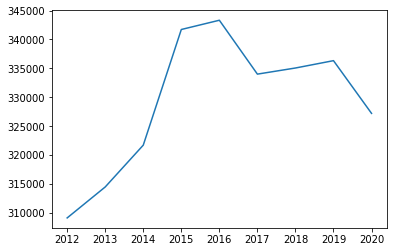

In [78]:
value = stat_per_year(resi_house_data, 'Assessed Value', year_list)
plt.plot(year_list, value)

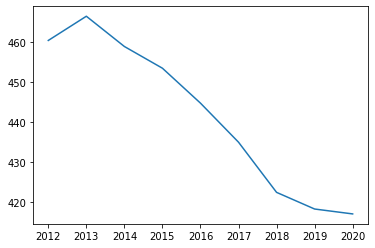

In [79]:
lot_size = stat_per_year(resi_house_data, 'Lot Size', year_list)
plt.plot(year_list, lot_size)

Off of a quick glance, we can see that the property values have gone up since 2012 to a peak in 2016 and has since dipped. Lot sizes have gotten smaller and smaller since 2013. 